<a href="https://colab.research.google.com/github/JoyeBright/Sentiment-Analysis/blob/master/SentiPers/Classifier/NN/GoogleColab/LSTM_CustomizedEmd/LSTM_CustomizedEmd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from keras.metrics import categorical_accuracy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Using TensorFlow backend.


# Import Dataset

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test_vecs_w2v.csv to test_vecs_w2v.csv
Saving train_vecs_w2v.csv to train_vecs_w2v.csv
Saving y_test.csv to y_test.csv
Saving y_train.csv to y_train.csv


# Conversion

In [6]:
y_train = pd.Series.from_csv("y_train.csv", sep="\t", header=0)
y_test = pd.Series.from_csv("y_test.csv", sep="\t", header=0)
test_vecs_w2v = pd.read_csv("test_vecs_w2v.csv", sep="\t")
train_vecs_w2v = pd.read_csv("train_vecs_w2v.csv", sep="\t")


test_vecs_w2v = test_vecs_w2v.iloc[:, 1:]
train_vecs_w2v = train_vecs_w2v.iloc[:, 1:]


test_vecs_w2v = test_vecs_w2v.values
train_vecs_w2v = train_vecs_w2v.values

# print(y_train[0])
# print(train_vecs_w2v[0])

# print(y_train.shape)
# print(y_test.shape)
# print(test_vecs_w2v.shape)
# print(train_vecs_w2v.shape)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:2890: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  infer_datetime_format=infer_datetime_format)


# Computation Environment

In [3]:
# CPU
!lscpu |grep 'Model name'

#no.of sockets i.e available slots for physical processors
!lscpu | grep 'Socket(s):'

#no.of cores each processor is having 
!lscpu | grep 'Core(s) per socket:'

#no.of threads each core is having
!lscpu | grep 'Thread(s) per core'

#memory that we can use
!cat /proc/meminfo | grep 'MemAvailable'

#if it had turbo boost it would've shown Min and Max MHz also but it is only showing current frequency this means it always operates at 2.3GHz
!lscpu | grep "MHz"

#GPU count and name
!nvidia-smi -L

#use this command to see GPU activity while doing Deep Learning tasks, for this command 'nvidia-smi' and for above one to work, go to 'Runtime > change runtime type > Hardware Accelerator > GPU'
!nvidia-smi

Model name:          Intel(R) Xeon(R) CPU @ 2.30GHz
Socket(s):           1
Core(s) per socket:  1
Thread(s) per core:  2
MemAvailable:   12561140 kB
CPU MHz:             2300.000
GPU 0: Tesla K80 (UUID: GPU-76a5878f-3e18-d09a-ac4e-6aae914390df)
Mon Jan 21 23:36:36 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 396.44                 Driver Version: 396.44                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
   

# LSTM NN Model Using Customized Word Embedding

Shape of X_Train: (5561, 100)
Shape of X_Test: (1854, 100)
Layer0 input shape: (None, 100, 1)
Layer0 output shape: (None, 100, 200)
Layer1 input shape: (None, 100, 200)
Layer1 output shape: (None, 100, 200)
Layer2 input shape: (None, 100, 200)
Layer2 output shape: (None, 100, 200)
Layer3 input shape: (None, 100, 200)
Layer3 output shape: (None, 200)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 200)          161600    
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 200)          320800    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 100, 200)          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 200)               320800    
______________________________________________________

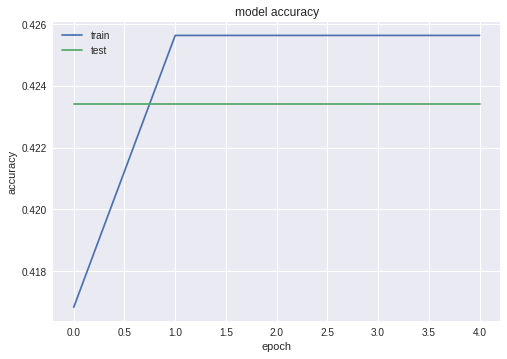

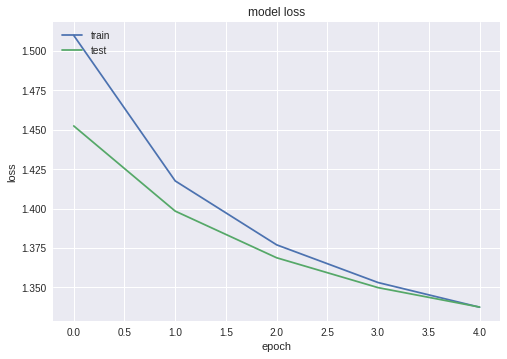

In [7]:

print("Shape of X_Train:", train_vecs_w2v.shape)
print("Shape of X_Test:", test_vecs_w2v.shape)
# print(WordEmbedding.train_vecs_w2v[0])
categorical_y_train = to_categorical(y_train, 5)
categorical_y_test = to_categorical(y_test, 5)
# print(categorical_y_train[0])

dropout_probability = 0.25
num_features = train_vecs_w2v.shape

# The input to every LSTM layer must be three dimensional.
# Samples. One sample is one sequence.
# Time Steps
# Features
x_train = train_vecs_w2v.reshape((5561, 100, 1))
x_test = test_vecs_w2v.reshape((1854, 100, 1))

# input_shape(time steps, features)
model = Sequential()
model.add(LSTM(200, return_sequences=True, activation="sigmoid",
               input_shape=(100, 1)))
print("Layer0 input shape:", model.layers[0].input_shape)
print("Layer0 output shape:", model.layers[0].output_shape)

model.add(LSTM(200, return_sequences=True, activation="sigmoid",
               input_shape=(100, 1)))
print("Layer1 input shape:", model.layers[1].input_shape)
print("Layer1 output shape:", model.layers[1].output_shape)

model.add(SpatialDropout1D(dropout_probability))

model.add(LSTM(200, return_sequences=False, activation="sigmoid"))
print("Layer2 input shape:", model.layers[2].input_shape)
print("Layer2 output shape:", model.layers[2].output_shape)

model.add(Dense(200, activation='softmax'))
print("Layer3 input shape:", model.layers[3].input_shape)
print("Layer3 output shape:", model.layers[3].output_shape)

model.add(Dense(5, activation="softmax"))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

print(model.summary())
print("Training ....")
history = model.fit(x_train, categorical_y_train,
          validation_data=(x_test, categorical_y_test),
          batch_size=64, epochs=5, verbose=2)
score = model.evaluate(x_test, categorical_y_test)

print("Accuracy: ", score[1])

# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()